In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [123]:
# Importing data and seperating Input & Output features
df = pd.read_csv("ex2data1.txt", header=None)
X = df.iloc[:, 0:2].values
y = df.iloc[:, 2].values

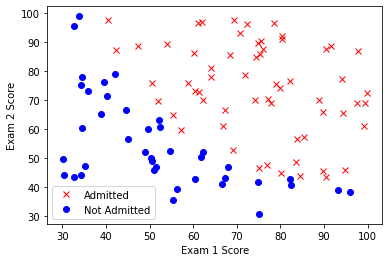

In [124]:
# Plotting data
positive = y == 1
negative = y == 0
plt.plot(X[positive, 0], X[positive, 1], "rx")
plt.plot(X[negative, 0], X[negative, 1], "bo")
plt.xlabel("Exam 1 Score")
plt.ylabel("Exam 2 Score")
plt.legend(["Admitted", "Not Admitted"])
plt.show()

In [26]:
# Inserting the bias layer
X_new = np.concatenate([np.ones([X.shape[0], 1]), X], axis=1)

In [125]:
# Sigmoid Function
def sigmoid(z):
    z = 1 / (1 + np.exp(-1 * z))
    return z

In [126]:
# Function to Compute Cost and Gradient
def costFunction(theta, X, y):
    m = y.size
    h = sigmoid(np.dot(X, theta))
    J = (np.dot(np.matrix.transpose(y), np.log(h)) + np.dot(np.matrix.transpose(1 - y), np.log(1 - h))) * (-1) / m
    grad = np.dot(np.matrix.transpose(X), (h - y)) * 1 / m
    return J, grad

In [159]:
# Setting up the Theta and Adding squared features
n = X.shape[1]
initialTheta = np.zeros(n + 1)

In [163]:
# Feature Scaling
mu = np.mean(X, axis=0)
sigma = np.std(X, axis=0)
X_norm = (X - mu) / sigma
X_norm = np.concatenate([np.ones([X_norm.shape[0], 1]), X_norm], axis=1)
X_norm

array([[ 1.        , -1.60224763,  0.63834112],
       [ 1.        , -1.82625564, -1.2075414 ],
       [ 1.        , -1.53903969,  0.3612943 ],
       [ 1.        , -0.28210129,  1.0863683 ],
       [ 1.        ,  0.69152826,  0.49337794],
       [ 1.        , -1.06199728, -0.5357394 ],
       [ 1.        , -0.23437234,  1.63818413],
       [ 1.        ,  0.4845113 , -1.06373024],
       [ 1.        ,  0.53998666,  1.14651105],
       [ 1.        ,  0.97044832, -1.22709853],
       [ 1.        ,  1.56075461, -1.51418452],
       [ 1.        ,  0.48393864, -1.92641626],
       [ 1.        ,  0.86065022,  0.55490359],
       [ 1.        ,  0.1921582 ,  1.70347834],
       [ 1.        , -1.34839922,  0.53082781],
       [ 1.        , -0.60293429,  1.24314792],
       [ 1.        ,  0.17694982, -0.72913975],
       [ 1.        ,  0.11893077, -1.05699346],
       [ 1.        ,  0.25914553,  1.44433023],
       [ 1.        ,  0.58543944, -1.00845873],
       [ 1.        ,  0.0892403 , -1.264

In [164]:
# Using Truncated Newton Algorithm to minimize the Cost Function and Fit the Parameters
from scipy import optimize
options = {'maxiter': 400}
res = optimize.minimize(costFunction, initialTheta, (X_norm, y), jac=True, method="TNC", options=options)
theta = res.x

ValueError: shapes (100,3) and (4,) not aligned: 3 (dim 1) != 4 (dim 0)

In [165]:
initialTheta

array([0., 0., 0., 0.])

In [135]:
# Function for making predictions
def predict(theta, X):
    p = sigmoid(np.dot(X, theta))
    return p

In [136]:
predict(theta, [1, 45, 85])

0.7762906241279501

Linear Model Value: 0.7762906241279501